In [50]:
import fastf1 as ff1
import fastf1.plotting as ff1pl
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from fastf1 import utils

In [30]:
ff1pl.setup_mpl()
ff1.Cache.enable_cache('cache')
pd.options.mode.chained_assignment = None

In [54]:
year, grand_prix, session = 2023, 'Bahrain', 'Q'

session = ff1.get_session(year, grand_prix, session)
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\getou\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\getou\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\getou\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a futur

api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']


In [59]:
driver_1, driver_2 = 'HAM', 'VER'
# Laps can now be accessed through the .laps object coming from the session
laps_driver_1 = quali.laps.pick_driver(driver_1)
laps_driver_2 = quali.laps.pick_driver(driver_2)

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

In [60]:
# Extract the delta time
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

In [61]:
plot_size = [15, 15]
plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} VS {driver_2}"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"

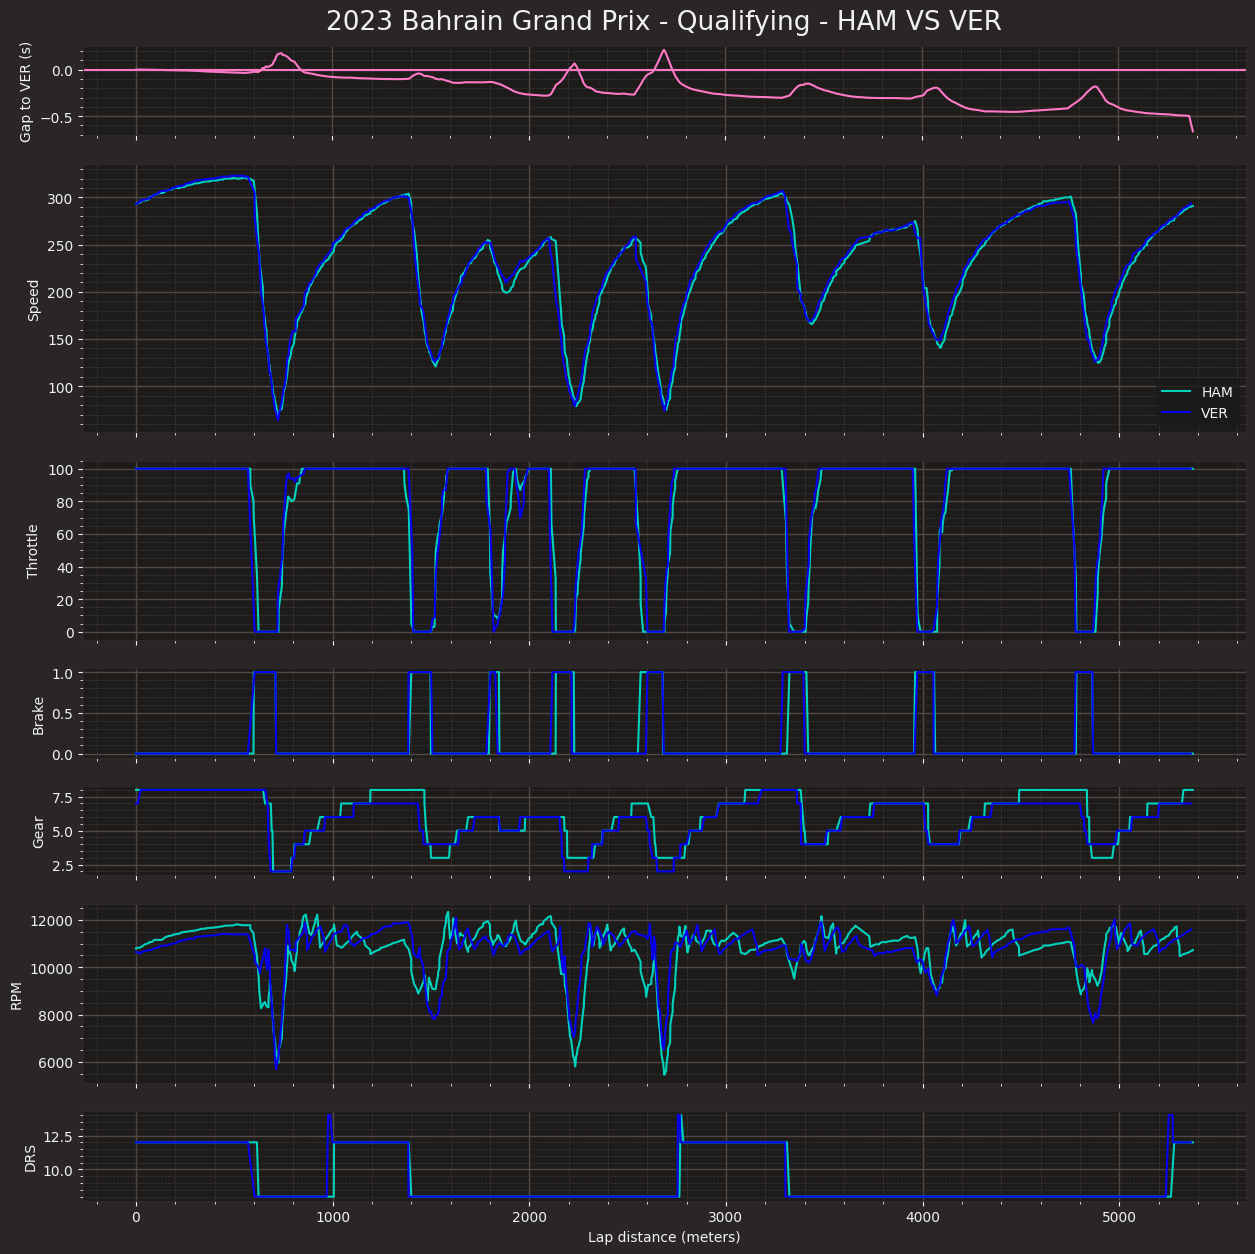

In [62]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax[0].title.set_text(plot_title)


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Speed trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
plt.savefig(plot_filename, dpi=300)
plt.show()